Barracks are buildings that spawn Lane Creeps and are defended by Tier 3 towers. There are two barracks for each lane. The time of destruction of barracks can be a helpful marker to predict the outcome of the match, as whichever team gets the first barracks kill demonstrates better teamwork, and also gets an advantage as it gets easier control over lanes as well as limits the farming capabilities of the opposing heros.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# Load datasets
matches = pd.read_csv('datasets/dota-2-matches/match.csv')
objectives = pd.read_csv('datasets/dota-2-matches/objectives.csv')

In [3]:
data = matches.set_index('match_id').join(objectives.set_index('match_id'), on='match_id')
data.head()

,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,key,player1,player2,slot,subtype,team,time,value
match_id,,,,,,,,,,,,,,,,,,,,
0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,NaN,0.0,6.0,0.0,CHAT_MESSAGE_FIRSTBLOOD,NaN,1.0,309.0
0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,NaN,3.0,-1.0,3.0,CHAT_MESSAGE_TOWER_KILL,2.0,894.0,2.0
0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,NaN,2.0,-1.0,NaN,CHAT_MESSAGE_ROSHAN_KILL,2.0,925.0,200.0
0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,NaN,1.0,-1.0,1.0,CHAT_MESSAGE_AEGIS,NaN,925.0,0.0
0,1446750112,2375,1982,4,3,63,1,22,True,0,1,155,NaN,7.0,-1.0,7.0,CHAT_MESSAGE_TOWER_KILL,3.0,1016.0,3.0


Barracks kills are marked by messages that pop up in chat. To get the time of the first baracks killed, we take the first time this message popped up in game.

In [4]:
result = data[data['subtype']=='CHAT_MESSAGE_BARRACKS_KILL'].sort_values('time').groupby(by='match_id').head(1)
result.head()

,start_time,duration,tower_status_radiant,tower_status_dire,barracks_status_dire,barracks_status_radiant,first_blood_time,game_mode,radiant_win,negative_votes,positive_votes,cluster,key,player1,player2,slot,subtype,team,time,value
match_id,,,,,,,,,,,,,,,,,,,,
31538,1447626141,478,2047,455,51,63,16,22,True,0,0,132,4.0,-1.0,-1.0,NaN,CHAT_MESSAGE_BARRACKS_KILL,NaN,317.0,4.0
2080,1447338670,441,2047,2040,60,63,9,2,True,0,0,133,16.0,-1.0,-1.0,NaN,CHAT_MESSAGE_BARRACKS_KILL,NaN,404.0,16.0
41434,1447736988,714,2046,7,3,63,0,22,True,0,0,204,4.0,-1.0,-1.0,NaN,CHAT_MESSAGE_BARRACKS_KILL,NaN,430.0,4.0
25291,1447580270,739,1983,452,51,63,31,22,True,0,0,123,4.0,-1.0,-1.0,NaN,CHAT_MESSAGE_BARRACKS_KILL,NaN,482.0,4.0
12058,1447452445,635,452,2047,63,51,0,22,False,0,0,204,256.0,-1.0,-1.0,NaN,CHAT_MESSAGE_BARRACKS_KILL,NaN,497.0,256.0


A particular teams tower status is given as an 8-bit unsigned integer. The rightmost 6 bits represent the barracks belonging to that team - https://wiki.teamfortress.com/wiki/WebAPI/GetMatchDetails#Barracks_Status

In [5]:
# Get the team that first killed barracks
result['first_barracks_kill'] = np.where(result['key'] <= 2**5, 'radiant', 'dire')

result_filtered = result[['time', 'radiant_win', 'first_barracks_kill']].copy()
result_filtered.sample(10)

,time,radiant_win,first_barracks_kill
match_id,,,
512,1390.0,False,dire
19622,2562.0,False,dire
9869,2135.0,False,dire
14828,1922.0,False,dire
43100,1782.0,True,radiant
990,2373.0,False,dire
10886,2514.0,False,dire
28518,1531.0,False,dire
4559,3018.0,True,radiant


We can see that even in a random sample, the number of teams that won and first killed barracks is very high.

In [8]:
# Add 1 and 0 based on team getting first barracks kill and winning and losing
result_filtered["first_kill_and_win"] = np.where(
    (result_filtered['radiant_win']) & (result_filtered['first_barracks_kill'] == 'radiant') |
    (result_filtered['radiant_win']==False) & (result_filtered['first_barracks_kill'] == 'dire'), 1, 0)

<AxesSubplot:xlabel='time', ylabel='Count'>

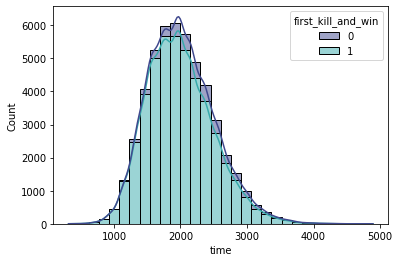

In [9]:
# Plot distributions
sns.histplot(x='time', 
             data=result_filtered, 
             stat='count', 
             multiple='stack', 
             hue='first_kill_and_win', 
             bins=30,
             element='bars',
             palette='mako',
             kde=True
            )

We can see that the correlation actually holds true, the first team to take down the opponent's barracks has a much higher chance of winning. We can also observe that the correlation is stronger for early game, and becomes weaker as time goes on.